In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as metrics

from mpl_toolkits.mplot3d import *
from regressors import stats
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

In [83]:
df = pd.read_csv('titanic.csv')
df_02 = df.copy()
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [84]:
df_02 = df_02.drop(['Name','Fare'], axis=1)

In [85]:
df_02 = pd.get_dummies(df_02, columns=['Sex'], drop_first= True, dtype='int64')
df_02.head()


,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Sex_male
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


In [86]:
df_02.rename( columns={'Sex_male':'Sex','Siblings/Spouses Aboard':'Ssa','Parents/Children Aboard':'Pca'}, inplace=True)
df_02.head()

,Survived,Pclass,Age,Ssa,Pca,Sex
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


<Figure size 1500x1500 with 0 Axes>

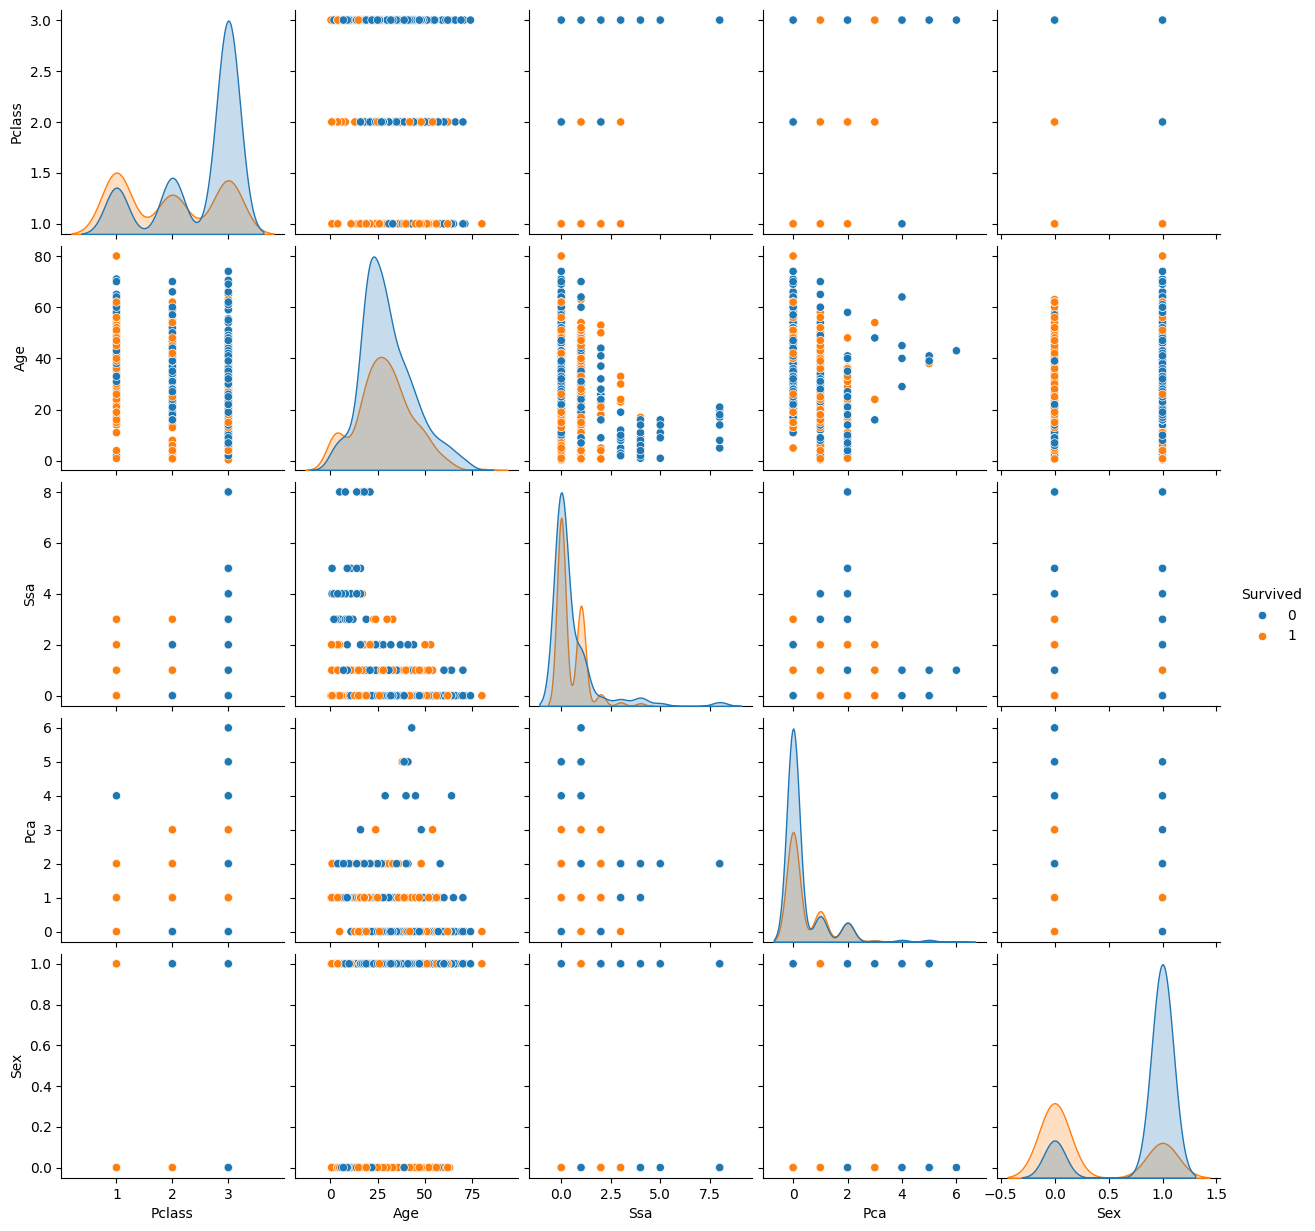

In [87]:
fig = plt.figure(figsize=(15,15))
sns.pairplot(df_02,hue='Survived')

In [88]:
df_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  887 non-null    int64  
 1   Pclass    887 non-null    int64  
 2   Age       887 non-null    float64
 3   Ssa       887 non-null    int64  
 4   Pca       887 non-null    int64  
 5   Sex       887 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 41.7 KB


In [89]:
x = df_02.drop('Survived', axis=1)
y = df_02.Survived

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42, test_size=0.3)

In [91]:
tree = DecisionTreeClassifier(max_depth = 3, random_state=42)

In [92]:
tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [93]:
y_pred = tree.predict(x_train)
y_test_pred = tree.predict(x_test)

In [94]:
#para ver  train vs pred
print(metrics.accuracy_score(y_train,y_pred))
#para ver test  vs pred
print(metrics.accuracy_score(y_test, y_test_pred ))

0.8370967741935483
0.7940074906367042


las variables relevantes para el test son


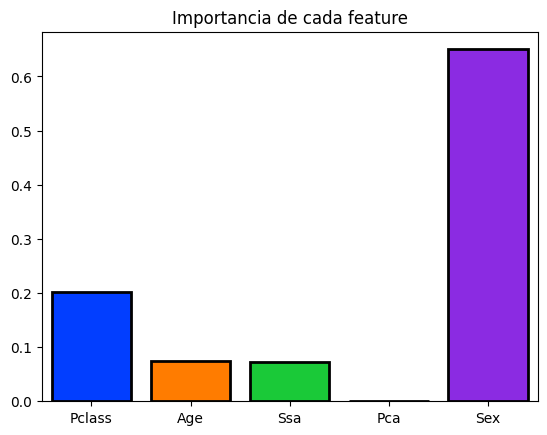

In [95]:
#veamos los importances
print("las variables relevantes para el test son")
importances = tree.feature_importances_
colums = x.columns
df_importances = pd.DataFrame([importances], columns=colums)
sns.barplot(df_importances, palette = 'bright', saturation= 2.0, edgecolor = 'black', linewidth= 2)
plt.title('Importancia de cada feature')
plt.show()